# TOOLS for Hologram reconstruction

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 8th 2021

In [1]:
import ipywidgets as widgets
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,4)

# Constants

## Hologram recording 

In [2]:
Z=200 # mm, distance between hologram and source plane

In [3]:
x_A=0 # mm, position of the source A
y_A=0 # mm, 

In [4]:
x_B=20 ## mm, position of the source B that will become the first order
y_B=0 ## mm

In [5]:
wl0=0.639e-3 ## recording wavelength in mm

In [6]:
XMIN=-0.1
XMAX=0.1
YMIN=-0.1
YMAX=0.1
NPIX=5000

## Function

In [7]:
def dd(x,y,x0,y0):
    """
    d_A(x,y,x0,y0) : distance between the point(x,y) on the hologram to the source of coordinate (x0,y0,Z)
    """
    
    dist = np.sqrt((x-x0)**2+(y-y0)**2+Z**2)
    
    return dist

In [8]:
def dd_diff(x,y):
    """
    d_ddiff(x,y) : distance difference between the two sources
    """
    dd_diff=dd(x,y,x_A,y_A)-dd(x,y,x_B,y_B)
    return dd_diff

In [9]:
def dd_phi(x,y):
    """
    dd_phase(x,y) : phase difference at point x,y on CCD
    """
    return 2*np.pi/wl0*dd_diff(x,y)

In [10]:
def interf_pattern(x,y):
    return 0.5*(np.cos(dd_phi(x,y))+1)

# plot

In [11]:
X=np.linspace(XMIN,XMAX,NPIX)

In [12]:
I0=interf_pattern(X,0)

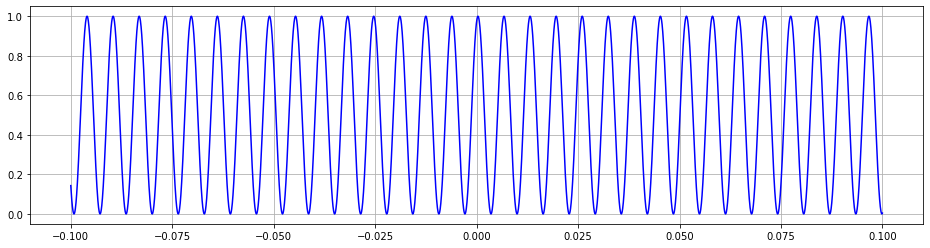

In [13]:
plt.plot(X,I0,'b-')
plt.grid()

In [14]:
X = np.linspace(XMIN, XMAX, NPIX)

Y = np.linspace(YMIN, YMAX, NPIX)

XX, YY = np.meshgrid(X, Y, sparse=True)

In [15]:
I1=dd_phi(XX,YY)
I2=interf_pattern(XX,YY)

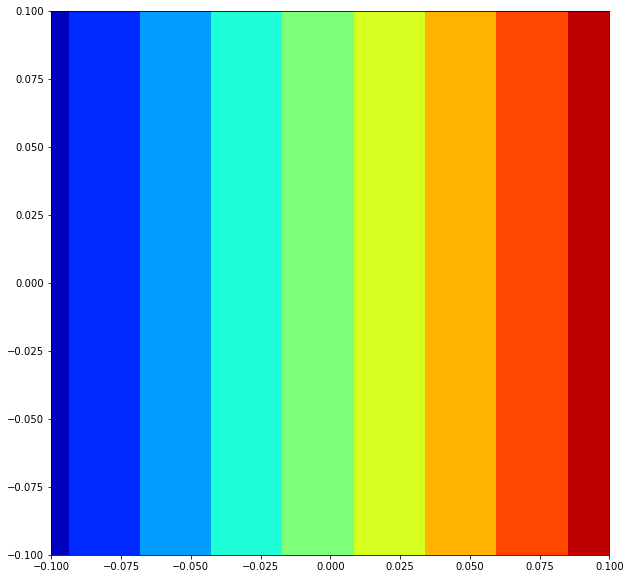

In [16]:
plt.figure(figsize=(10,10))
Z = I1
h = plt.contourf(X,Y,Z,cmap="jet")
plt.show()

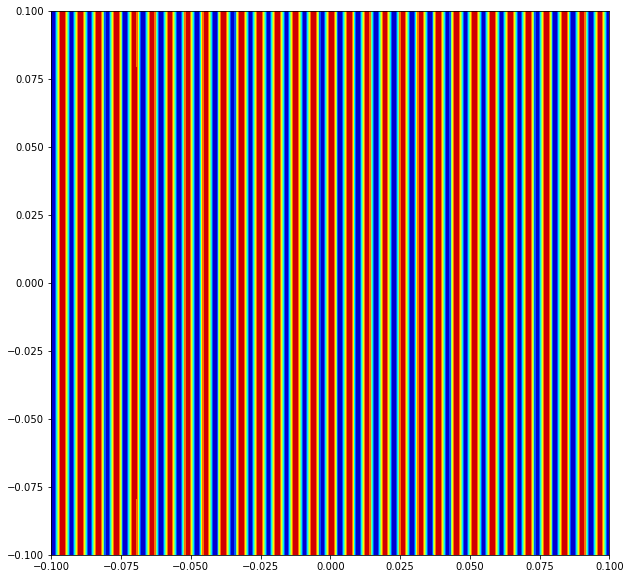

In [17]:
plt.figure(figsize=(10,10))
Z = I2
h = plt.contourf(X,Y,Z,cmap="jet")
plt.show()

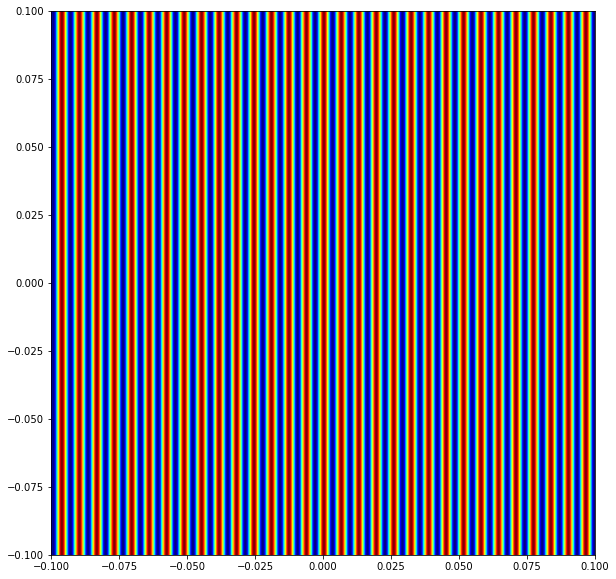

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(I2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))